In [2]:
import pandas as pd 
from scipy import stats
circulating_supply = pd.read_csv("../../data/circulating-supply.csv")
delta_cap = pd.read_csv("../../data/delta-cap.csv")
entity_adjusted_realized_cap = pd.read_csv("../../data/entity-adjusted-realized-cap.csv")
realized_price = pd.read_csv("../../data/realized-price.csv")
bitcoin_price = pd.read_csv("../../data/bitcoin-price.csv")

In [3]:
result = pd.concat([delta_cap, entity_adjusted_realized_cap, bitcoin_price, ], axis=1, join='outer')
result['Delta-Cap/Realized-Cap'] = result['delta-cap']/result['realized-cap']
result = result.loc[:,~result.columns.duplicated()]
result['date'] = pd.to_datetime(result['timestamps']).apply(lambda x: x.date())
result['z-score'] = stats.zscore(result['Delta-Cap/Realized-Cap'] ,nan_policy='omit') 

In [5]:
delta_price = pd.concat([delta_cap, circulating_supply, realized_price, bitcoin_price], axis=1, join='outer')
delta_price
delta_price['delta-price'] = delta_price['delta-cap']/delta_price['supply']
delta_price['Delta-Price/Realized-Price'] = delta_price['delta-price']/delta_price['realized-price']
delta_price = delta_price.loc[:,~delta_price.columns.duplicated()]
pd.to_datetime(delta_price['timestamps'])
delta_price['date'] = pd.to_datetime(delta_price['timestamps']).apply(lambda x: x.date())
delta_price['z-score'] = stats.zscore(delta_price['Delta-Price/Realized-Price'] ,nan_policy='omit')

<function matplotlib.pyplot.show(close=None, block=None)>

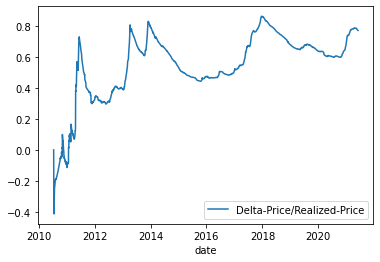

In [14]:
 import matplotlib.pyplot as plt
 delta_price.plot(x="date", y=["Delta-Price/Realized-Price"])
 plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

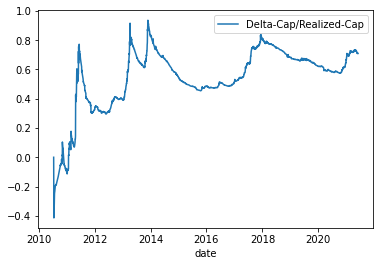

In [17]:
result.plot(x="date", y=["Delta-Cap/Realized-Cap"])
plt.show

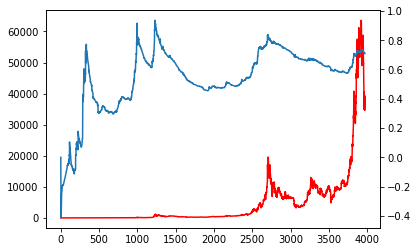

In [28]:
fig, ax1 = plt.subplots()
data1 = result['value']
data2 = result['Delta-Cap/Realized-Cap']
ax1.plot(data1, color='red')
ax2 = ax1.twinx() 
ax2.plot(data2)
plt.show()
